In [1]:
pip install PyPDF2 pytesseract pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'"C:\Program Files\Tesseract-OCR"'

In [4]:
import pandas as pd
from itertools import combinations
import random
import matplotlib.pyplot as plt
from textwrap import wrap
from datetime import datetime
import pytesseract
from PIL import Image
import io
from IPython.display import display
import ipywidgets as widgets

# Load the DataFrame from CSV
df = pd.read_csv('starsdb.csv')

def filter_courses(df, degree, courses_taken):
    # Filter the DataFrame based on degree and courses taken
    filtered_df = df[(df['Programme'] == degree) & 
                     (~df['Course Code'].isin(courses_taken))]
    return filtered_df

# User inputs
degree = input("Enter your degree: ")

# Define a function to handle the image upload
def handle_image_upload(change):
    global courses_taken
    # Get the uploaded image
    uploaded_image = change['new'][0]
    
    # Read the image from the uploaded file
    img = Image.open(io.BytesIO(uploaded_image['content']))
    
    # Use Tesseract to do OCR on the image
    text = pytesseract.image_to_string(img)
    
    # Print the extracted text
    print("Extracted text:")
    print(text)
    
    # Split the text into lines
    lines = text.strip().split('\n')

    # Extract the column you want (e.g., the second column)
    column_index = 2  # Adjust index based on zero-based indexing
    courses_taken = [line.split()[column_index] for line in lines[2:]]  # Skip header line

    # Print the extracted column data
    print("Extracted courses taken:")
    print(courses_taken)

# Create a FileUpload widget
file_upload = widgets.FileUpload()

# Register the function to handle the image upload event
file_upload.observe(handle_image_upload, names='value')

# Display the FileUpload widget
display(file_upload)


Enter your degree:  EEE


FileUpload(value=(), description='Upload')

In [5]:
print(text)

NameError: name 'text' is not defined

In [10]:

import pandas as pd
import pytesseract
from PIL import Image
import io
from IPython.display import display
import ipywidgets as widgets

# Load the DataFrame from CSV
df = pd.read_csv('starsdb.csv')

def filter_courses(df, degree, courses_taken):
    # Filter the DataFrame based on degree and courses taken
    filtered_df = df[(df['Programme'] == degree) & 
                     (~df['Course Code'].isin(courses_taken))]
    return filtered_df

# Define a function to handle the image upload
def handle_image_upload(change):
    global courses_taken, degree
    # Get the uploaded image
    uploaded_image = change['new'][0]
    
    # Read the image from the uploaded file
    img = Image.open(io.BytesIO(uploaded_image['content']))
    
    try:
        # Use Tesseract to do OCR on the image
        text = pytesseract.image_to_string(img)
        # Display the extracted text
        extracted_text_widget.value = text
        # Print the extracted text
        print("Extracted text:")
        print(text)
        
        # Split the text into lines
        lines = text.strip().split('\n')

        # Extract the column you want (e.g., the second column)
        column_index = 2  # Adjust index based on zero-based indexing
        courses_taken = [line.split()[column_index] for line in lines[2:]]  # Skip header line

        # Print the extracted column data
        print("Extracted courses taken:")
        print(courses_taken)
        
        # Print courses_taken here if you want to see the updated value immediately after image upload
        # print(courses_taken)
    except Exception as e:
        # Handle any exceptions that occur during text extraction
        print("Error extracting text:", e)

# Create a Text widget for entering the degree
degree_text = widgets.Text(description='Enter your degree:', value='')

# Create a FileUpload widget
file_upload = widgets.FileUpload()

# Create a Text widget to display the extracted text
extracted_text_widget = widgets.Textarea(description='Extracted Text:', disabled=True)

# Register the function to handle the image upload event
file_upload.observe(handle_image_upload, names='value')

# Define a function to update the degree variable
def update_degree(change):
    global degree
    degree = change.new

# Register the function to update the degree variable
degree_text.observe(update_degree, names='value')

# Display the widgets
display(degree_text)
display(file_upload)
display(extracted_text_widget)


Text(value='', description='Enter your degree:')

FileUpload(value=(), description='Upload')

Textarea(value='', description='Extracted Text:', disabled=True)

Total AU: 16
[]


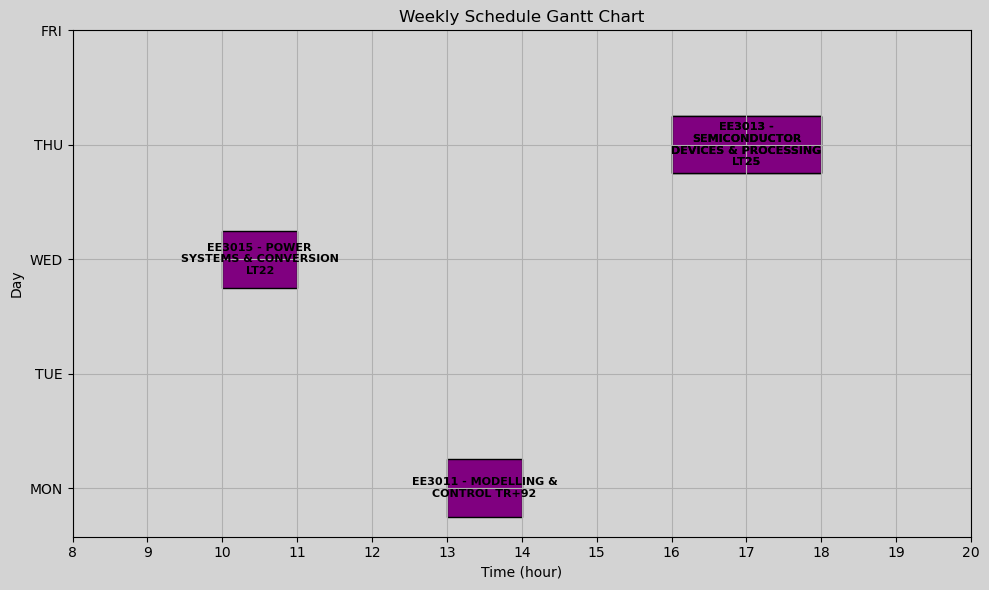

In [7]:

# Filter the DataFrame
filtered_df = filter_courses(df, degree, courses_taken)

# Use the filtered DataFrame for further processing
starsdb = filtered_df

def find_combinations(db, target_au):
    # Drop duplicates to avoid counting courses multiple times
    starsdb_no_duplicates = db.drop_duplicates(subset=['Course Code'])
    courses = starsdb_no_duplicates['Course Code'].tolist()
    au_values = starsdb_no_duplicates['AU'].tolist()
    combined_list = list(zip(courses, au_values))
    
    possible_combinations = []
    unique_combinations = []

    # Find combinations of courses that add up to the target AU
    for r in range(1, len(combined_list) + 1):
        for combo in combinations(combined_list, r):
            if not check_collision(combo):
                total_au = sum(au for _, au in combo)
                if total_au == target_au:
                    courses_only = [course for course, _ in combo]
                    possible_combinations.append(courses_only)

    # Remove duplicates from possible combinations
    for sublist in possible_combinations:
        unique_sublist = list(set(sublist))
        unique_sublist.sort()
        if unique_sublist not in unique_combinations:
            unique_combinations.append(unique_sublist)

    return unique_combinations

def check_collision(combination):
    """
    Check if there is any collision (day, start time, end time) within the given combination of courses.
    """
    schedule = {}
    for course, _ in combination:
        course_info = starsdb[starsdb['Course Code'] == course].iloc[0]
        day = course_info['Day']
        start_time = course_info['Start Time']
        end_time = course_info['End Time']
        for i in range(start_time, end_time):
            if (day, i) in schedule:
                return True  # Collision found
            schedule[(day, i)] = True
    return False  # No collision found

total_au = int(input("Total AU: "))
print(find_combinations(starsdb, total_au))

# Remove courses from filtered_df that are not present in starsdb
filtered_df = filtered_df[filtered_df['Course Code'].isin(starsdb['Course Code'])]

# Define the Course class
class Course:
    def __init__(self, code, name, start_time, end_time, day, venue):
        self.code = code
        self.name = name
        self.start_time = start_time
        self.end_time = end_time
        self.day = day[:3].upper()  # Convert to uppercase for consistency
        self.venue = venue


# Function to generate a schedule based on a list of course modules
def generate_schedule(course_modules):
    schedule = []
    for idx, course in enumerate(course_modules):
        # Convert integer start time and end time to string before parsing
        start_time = datetime.strptime(str(course['Start Time']), '%H%M').time()
        end_time = datetime.strptime(str(course['End Time']), '%H%M').time()
        schedule.append(Course(course['Course Code'], course['Title'], start_time, end_time, course['Day'], course['Venue']))
    return schedule


# Convert DataFrame to Course objects
filtered_courses = filtered_df.to_dict('records')

# Select a random combination of courses from filtered courses
random_combination = random.choice(list(combinations(filtered_courses, 3)))

# Generate schedule based on the random combination
schedule = generate_schedule(random_combination)

# Prepare data for Gantt chart
days = ['MON', 'TUE', 'WED', 'THU', 'FRI']
timings = list(range(8, 20))
course_data = {day: [[] for _ in range(len(timings))] for day in days}

# Fill in course data
for course in schedule:
    day_index = days.index(course.day)
    for hour_index in range(course.start_time.hour - 8, course.end_time.hour - 8):
        if hour_index >= 0 and hour_index < len(timings):
            course_data[course.day][hour_index].append(course)

# Plot Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_height = 0.5

for i, day in enumerate(days):
    for j, hour in enumerate(timings):
        courses = course_data[day][j]
        num_courses = len(courses)
        if num_courses > 0:
            bar_width = 1 / (num_courses + 1)
            for k, course in enumerate(courses):
                left_pos = course.start_time.hour + k * bar_width
                ax.barh(i, course.end_time.hour - course.start_time.hour, 
                         left=left_pos, height=bar_height, color='purple', edgecolor='black', align='center')
                wrapped_text = "\n".join(wrap(f"{course.code} - {course.name}\n{course.venue}", width=20))
                ax.text((course.start_time.hour + course.end_time.hour) / 2, i, wrapped_text, ha='center', va='center', fontsize=8, fontweight='bold', color='black')

ax.set_xlabel('Time (hour)')
ax.set_ylabel('Day')
ax.set_title('Weekly Schedule Gantt Chart')
ax.set_xlim(8, 20)
ax.set_xticks(range(8, 21))
ax.set_yticks(range(len(days)))
ax.set_yticklabels(days)
ax.grid(True)
ax.set_facecolor('lightgrey')  # Set background color
fig.patch.set_facecolor('lightgrey')  # Set figure background color
ax.spines['bottom'].set_color('black')  # Set color of bottom spine
ax.spines['top'].set_color('black')  # Set color of top spine
ax.spines['left'].set_color('black')  # Set color of left spine
ax.spines['right'].set_color('black')  # Set color of right spine
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
